In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import pickle
from sklearn.externals import joblib
import h5py
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from functools import reduce

In [32]:
#define file path
hf_path = '/home/smahesh3/ondemand/data/sys/dashboard/batch_connect/sys/jupyter-notebook/MODIS_MLData_Shape_64x64_2020057.1300_.hdf'
# hf_path = '/home/hackathon/output_64_Javier_labelled/MODIS_MLData_Shape_64x64_2009003.1430_.hdf'

hf_file = h5py.File(hf_path,'r')
hf_keys = list(hf_file.keys())

# All Images informations
imagesData = dict()
imagesData[hf_path] = dict()
good_filenames = list()


#access all data within images; save into an array if you like
#automatically extracted as numpy arrays
for image_num in hf_keys:

    Classification_Accuracy = hf_file[image_num + '/ClassificationAccuracy'][()]
    Feature_Labels          = hf_file[image_num + '/FeatureLabels'][()]
    Image_Classification    = hf_file[image_num + '/ImageClassification'][()]
    Image_Features          = hf_file[image_num + '/ImageFeatures'][()]
    
    imagesData[hf_path][image_num] = list()
    imagesData[hf_path][image_num].append(Classification_Accuracy)
    imagesData[hf_path][image_num].append(Feature_Labels)
    imagesData[hf_path][image_num].append(Image_Classification)
    imagesData[hf_path][image_num].append(Image_Features)
    good_filenames.append(hf_path)



In [33]:
len(imagesData[hf_path])

185

In [34]:
dataframeDictionary = dict()
dataframeDictionary["Ground_truth"] = list()
# importantFeatures = [31,14,25,30,17,21,29,26]
# importantFeatures = [14,25,31]

# Prepare dictionary for all image features
for filename in imagesData:
    for image in imagesData[filename]:  
        allImageFeatures = imagesData[filename][image][3]
        for whichFeature in range(len(allImageFeatures)):
            dataframeDictionary[whichFeature] = list()

# Populating the data frame with all features and ground truth
for filename in imagesData:
    for image in imagesData[filename]:
        allImageFeatures = imagesData[filename][image][3]
        for whichFeature in range(len(allImageFeatures)):
            imageFeatureMatrix = imagesData[filename][image][3][whichFeature]
            for x in range(len(imageFeatureMatrix)):
                for y in range(len(imageFeatureMatrix[x])):
                    dataframeDictionary[whichFeature].append(imageFeatureMatrix[x][y])
        
        # Ground Truth 
        groundTruthMatrix = imagesData[filename][image][2]
        for x in range(len(groundTruthMatrix)):
                for y in range(len(groundTruthMatrix[x])):
                    if groundTruthMatrix[x][y] > 1:
                        groundTruthMatrix[x][y] = 1
                    dataframeDictionary["Ground_truth"].append(groundTruthMatrix[x][y])

dataframe = pd.DataFrame(dataframeDictionary)

In [35]:
#Data processing to prepare result

undefined_indices = []

def rows_to_numpy_arr(pixel_rows, offset):
    arr, undefined_indices = [], []
    for i in range(0,64):
        new_row = []
        for j in range(0,64):
            m = 0
            try:
                m = pixel_rows[4096*offset + (64*i + j)]
            except:
                if (4096*offset + (64*i + j)) not in undefined_indices:
                    undefined_indices.append(4096*offset + (64*i + j))
                
            new_row.append(0 if (m == 0) else 1)
        arr.append(new_row)
    return np.array(arr, np.int32)

def plot_2d_numpy_arr(np_arr, title=''):
    f = plt.figure(figsize = (5, 5))
    f.add_subplot(1, 1, 1)
    cs = plt.imshow(np_arr)
    cbar = f.colorbar(cs)

    plt.title(title)

In [46]:
logreg = joblib.load("all_weighted.pkl")
# logreg = joblib.load("all_good.pkl")
# logreg = joblib.load("FinalLogRegOverAllFeatures.pkl")
# logreg = joblib.load("TheLogReg.pkl")

image_num = 130
x_image = dataframe.drop("Ground_truth", axis=1)[4096*image_num:4096*(image_num+1)]
y_image = dataframe.Ground_truth[4096*image_num:4096*(image_num+1)]
y_predict = logreg.predict(x_image)

accuracy = 0.983642578125


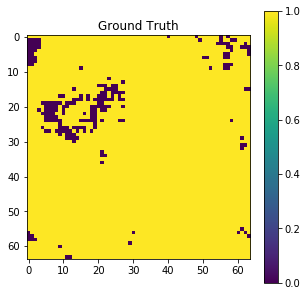

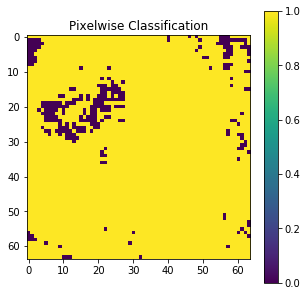

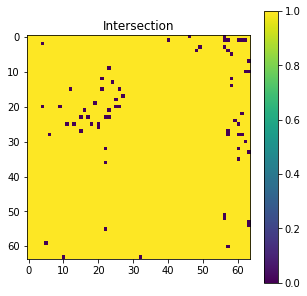

In [47]:
test = y_image.astype(int).tolist()
predict = y_predict.astype(int).tolist()

test_arr = rows_to_numpy_arr(test, 0)
plot_2d_numpy_arr(test_arr, "Ground Truth")

pred_arr = rows_to_numpy_arr(predict, 0)
plot_2d_numpy_arr(pred_arr, "Pixelwise Classification")

diff = test_arr == pred_arr
plot_2d_numpy_arr(diff.astype(int), "Intersection")

flatten_list = reduce(lambda z, y :z + y, diff.tolist())
print("accuracy = " + str(len([x for x in flatten_list if x != 0])/4096))

In [9]:
#define file path
images = hf_path

hf_file = h5py.File(images,'r')
hf_keys = list(hf_file.keys())

imagesData = dict()


file_path = images

#grab h5py file object
try:
    hf_file = h5py.File(file_path, 'r')
except OSError:
    OsErrors += 1

#list the main groups; image number in this case
hf_keys = list(hf_file.keys())

# All Images informations
imagesData = dict()

#access all data within images; save into an array if you like
#automatically extracted as numpy arrays
for image_num in hf_keys:

    Classification_Accuracy = hf_file[image_num + '/ClassificationAccuracy'][()]
    Feature_Labels          = hf_file[image_num + '/FeatureLabels'][()]
    Image_Classification    = hf_file[image_num + '/ImageClassification'][()]
    Image_Features          = hf_file[image_num + '/ImageFeatures'][()]

    imagesData[image_num] = list()
    imagesData[image_num].append(Classification_Accuracy)
    imagesData[image_num].append(Feature_Labels)
    imagesData[image_num].append(Image_Classification)
    imagesData[image_num].append(Image_Features)


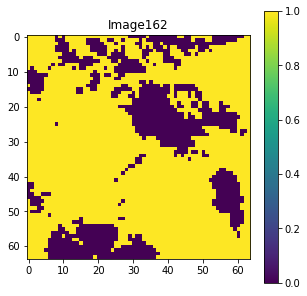

In [10]:
for i,_ in enumerate(hf_keys):
    if i != 162:
        continue;
    f = plt.figure(figsize = (5, 5))
    f.add_subplot(1, 1, 1)
    imagesData[hf_keys[i]][2][imagesData[hf_keys[i]][2] > 0] = 1
    cs = plt.imshow(imagesData[hf_keys[i]][2])

    cbar = f.colorbar(cs)
    cbar.ax.minorticks_off()
    plt.title('Image' + str(i))
    
    break